In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Loading Data
fear_greed_df = pd.read_csv("fear_greed_index.csv")
trade_data_df = pd.read_csv("historical_data.csv")

In [3]:
fear_greed_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [4]:
trade_data_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [5]:
# Preprocess

fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'])
trade_data_df['Timestamp IST'] = pd.to_datetime(trade_data_df['Timestamp IST'], format="%d-%m-%Y %H:%M")
trade_data_df['date'] = trade_data_df['Timestamp IST'].dt.date
trade_data_df['date'] = pd.to_datetime(trade_data_df['date'], format="%d-%m-%Y")

In [6]:
trade_data_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02


In [7]:
fear_greed_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [8]:
fear_greed_df.size

10576

In [9]:
trade_data_df.size

3590808

In [10]:
# Merge Sentiment

merged_df = pd.merge(trade_data_df, fear_greed_df[['date', 'classification']], on='date', how='left')

In [11]:
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed


In [12]:
merged_df.size

3802032

In [13]:
merged_df = merged_df.dropna(subset=['classification'])

In [14]:
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed


In [15]:
merged_df.size

3801924

In [16]:
# Step 2: Overall sentiment performance
overall_sentiment = (
    merged_df.groupby("classification")
    .agg(
        total_pnl=('Closed PnL', 'sum'),
        avg_pnl=('Closed PnL', 'mean'),
        trades=('Closed PnL', 'count'),
        avg_fee=('Fee', 'mean'),
        avg_size_usd=('Size USD', 'mean')
    )
    .reset_index()
    .sort_values(by="total_pnl", ascending=False)
)

print("\nOverall sentiment performance:")
print(overall_sentiment)


Overall sentiment performance:
  classification     total_pnl    avg_pnl  trades   avg_fee  avg_size_usd
2           Fear  3.357155e+06  54.290400   61837  1.495172   7816.109931
1  Extreme Greed  2.715171e+06  67.892861   39992  0.675902   3112.251565
3          Greed  2.150129e+06  42.743559   50303  1.254372   5736.884375
4        Neutral  1.292921e+06  34.307718   37686  1.044798   4782.732661
0   Extreme Fear  7.391102e+05  34.537862   21400  1.116291   5349.731843


In [17]:
# Step 3: Aggregate daily performance by sentiment
daily_sentiment_pnl = (
    merged_df
    .groupby(['date', 'classification'])
    .agg(
        total_pnl=('Closed PnL', 'sum'),
        avg_pnl=('Closed PnL', 'mean'),
        trade_count=('Closed PnL', 'count')
    )
    .reset_index()
)

print("Daily Performance Breakdown:")
print(daily_sentiment_pnl.head())

Daily Performance Breakdown:
        date classification   total_pnl    avg_pnl  trade_count
0 2023-05-01          Greed    0.000000   0.000000            3
1 2023-12-05  Extreme Greed    0.000000   0.000000            9
2 2023-12-14          Greed -205.434737 -18.675885           11
3 2023-12-15          Greed  -24.632034 -12.316017            2
4 2023-12-16          Greed    0.000000   0.000000            3


In [18]:
# Step 3: Top-performing accounts by sentiment
account_sentiment = (
    merged_df.groupby(['Account', 'classification'])
    .agg(total_pnl=('Closed PnL', 'sum'), avg_pnl=('Closed PnL', 'mean'), trades=('Closed PnL', 'count'))
    .reset_index()
)

top_accounts = (
    account_sentiment.sort_values(by='total_pnl', ascending=False)
    .groupby('classification')
    .head(5)
)

print("\nTop 5 accounts per sentiment:")
print(top_accounts.head)


Top 5 accounts per sentiment:
<bound method NDFrame.head of                                         Account classification     total_pnl  \
2    0x083384f897ee0f19899168e3b1bec365f52a9012           Fear  1.113374e+06   
135  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  Extreme Greed  1.105305e+06   
143  0xbaaaf6571ab7d571043ff1e313a9609a10637864           Fear  6.208724e+05   
137  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23          Greed  5.340582e+05   
152  0xbee1707d6b44d4d52bfe19e41f8a828645437aab  Extreme Greed  4.788115e+05   
78   0x72743ae2822edd658c0c50608fd7c5c501b2afbd          Greed  4.535953e+05   
138  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23        Neutral  4.013094e+05   
69   0x513b8629fe877bb581bf244e326a047b249c4ff1        Neutral  3.813305e+05   
67   0x513b8629fe877bb581bf244e326a047b249c4ff1           Fear  3.671662e+05   
57   0x4acb90e786d897ecffb614dc822eb231b4ffb9f4           Fear  2.967817e+05   
3    0x083384f897ee0f19899168e3b1bec365f52a9012          Gr

In [19]:
# Step 4: Sentiment-wise trading behavior
behavior = (
    merged_df.groupby('classification')
    .agg(
        avg_trade_size=('Size USD', 'mean'),
        avg_leverage=('Start Position', 'mean'),
        buy_ratio=('Side', lambda x: (x == 'BUY').sum() / len(x))
    )
    .reset_index()
)

print("\nTrader behavior under each sentiment:")
print(behavior)


Trader behavior under each sentiment:
  classification  avg_trade_size   avg_leverage  buy_ratio
0   Extreme Fear     5349.731843   -2322.304587   0.510981
1  Extreme Greed     3112.251565   19518.990812   0.448590
2           Fear     7816.109931    8709.824822   0.489513
3          Greed     5736.884375 -151088.546635   0.488559
4        Neutral     4782.732661     144.002263   0.503343


/var/folders/wp/b7j3byf17pn145my75d2hfth0000gn/T/ipykernel_47151/3458247263.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=overall_sentiment, x='classification', y='total_pnl', palette='coolwarm')
/var/folders/wp/b7j3byf17pn145my75d2hfth0000gn/T/ipykernel_47151/3458247263.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=overall_sentiment, x='classification', y='avg_pnl', palette='viridis')


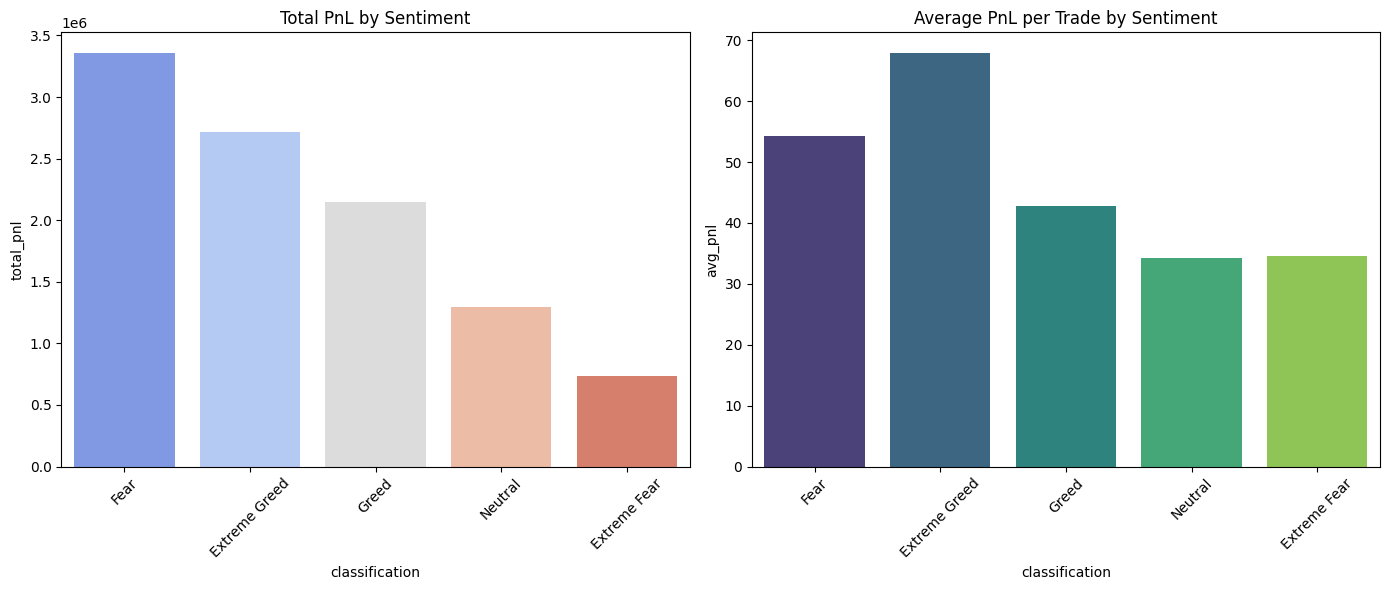

In [20]:
# Step 5: Visualizations
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=overall_sentiment, x='classification', y='total_pnl', palette='coolwarm')
plt.title("Total PnL by Sentiment")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(data=overall_sentiment, x='classification', y='avg_pnl', palette='viridis')
plt.title("Average PnL per Trade by Sentiment")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

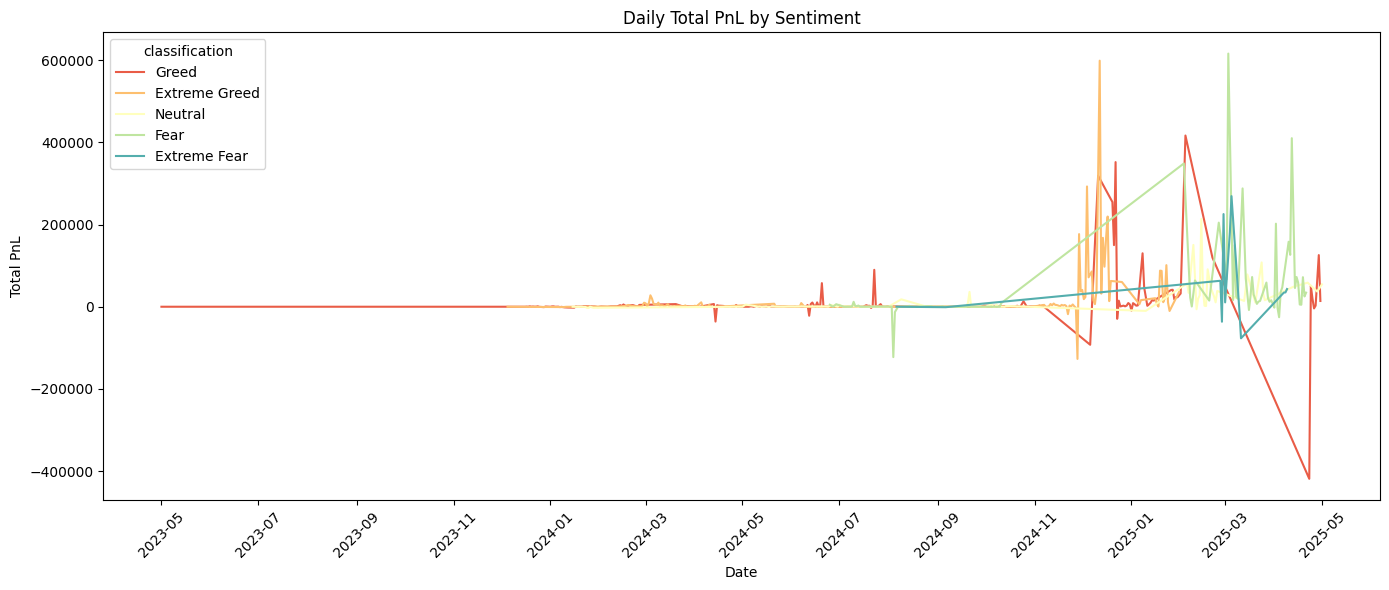

/var/folders/wp/b7j3byf17pn145my75d2hfth0000gn/T/ipykernel_47151/1349487783.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='classification', y='Closed PnL', palette='coolwarm')


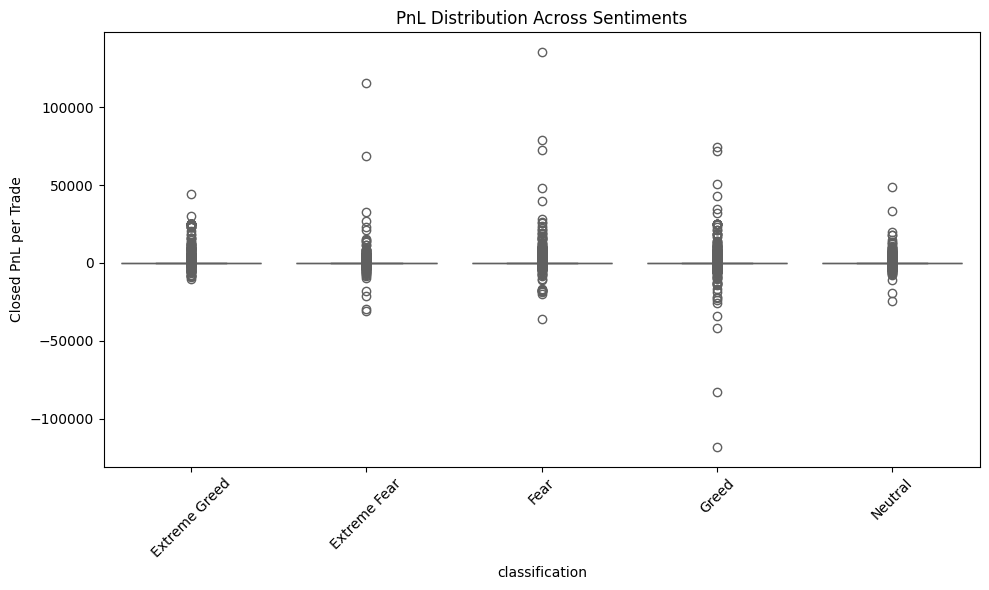

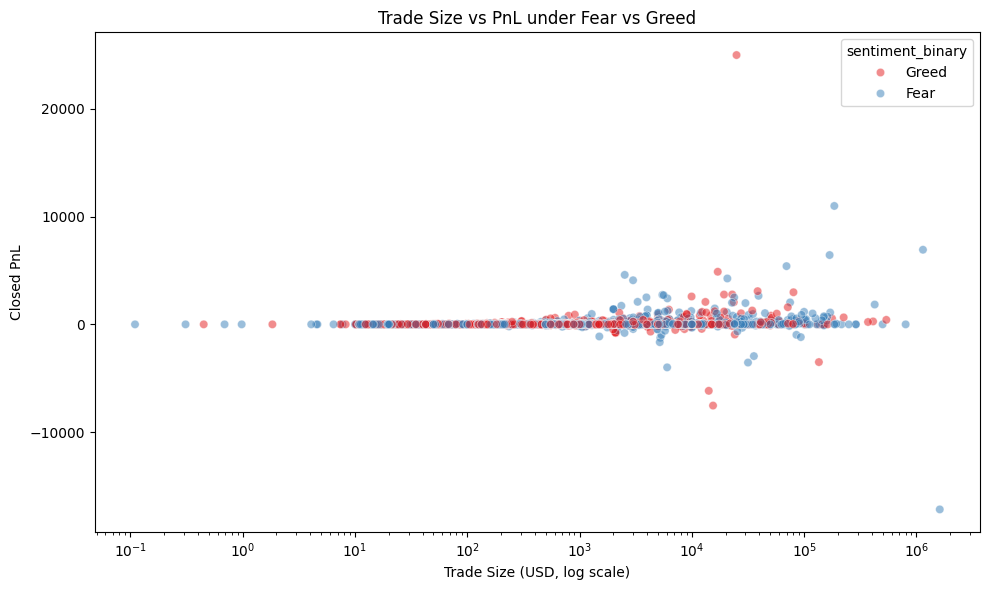

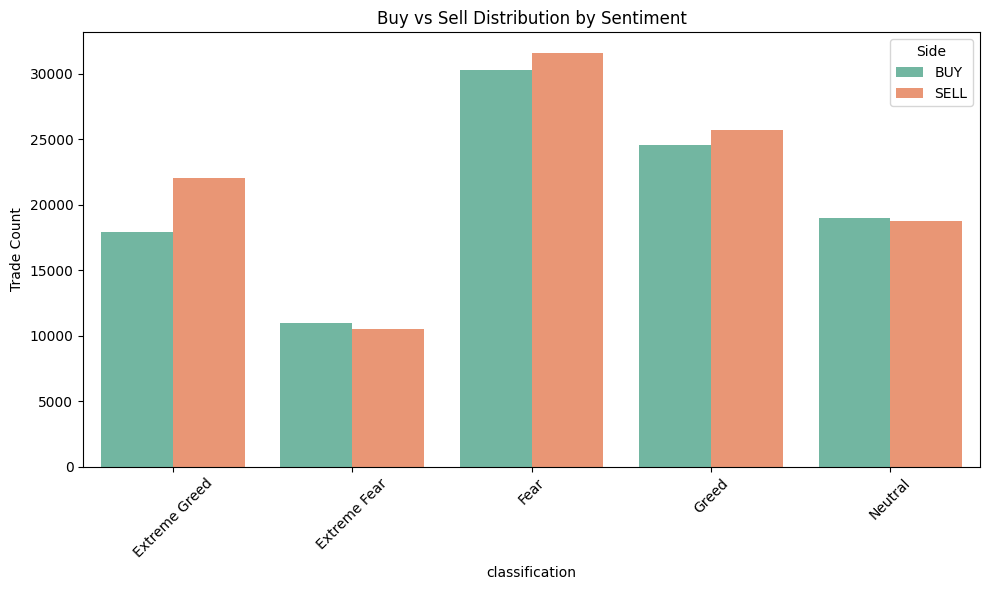

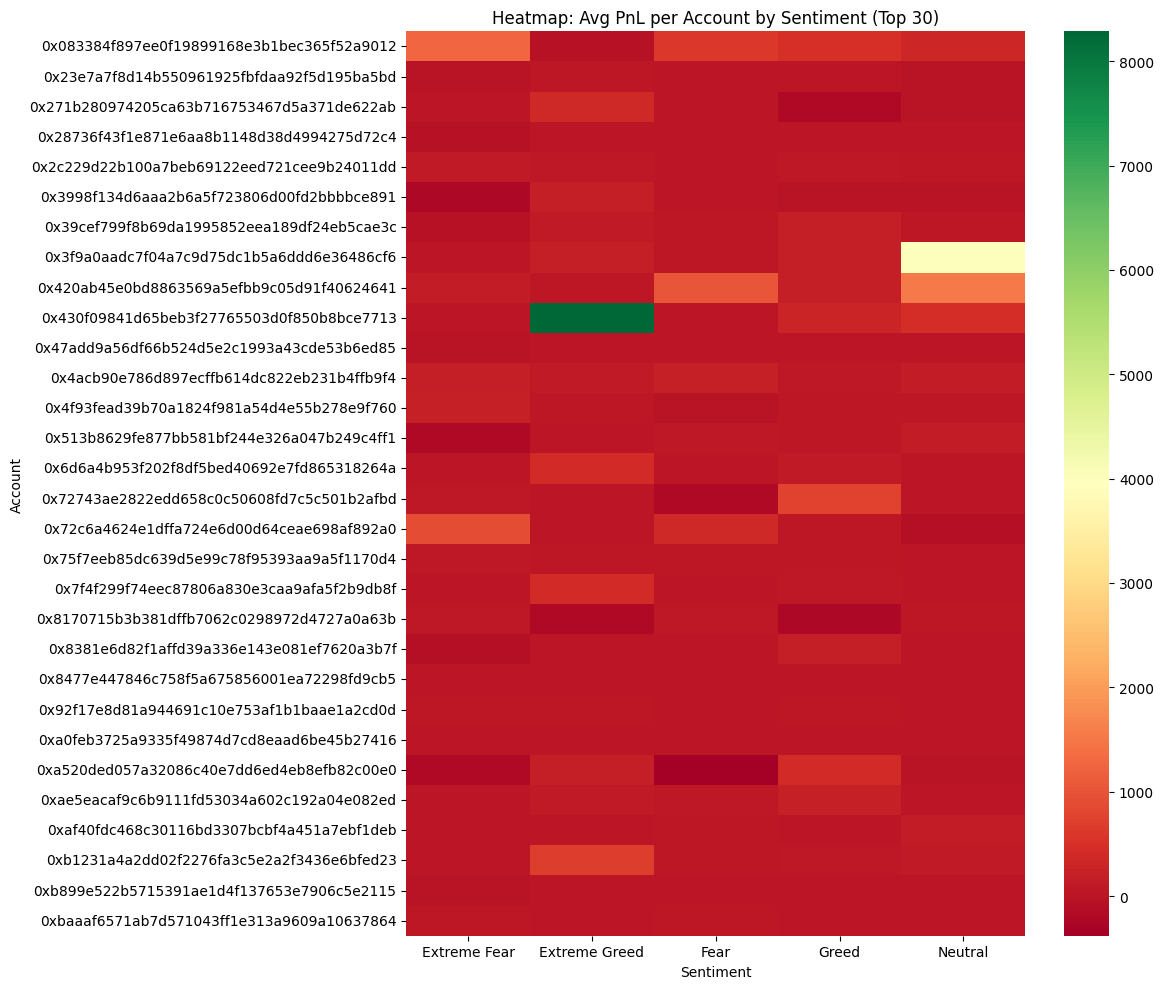

In [21]:
import matplotlib.dates as mdates

# Add sentiment simplification
merged_df['sentiment_binary'] = merged_df['classification'].apply(lambda x: 'Greed' if 'Greed' in x else 'Fear')
merged_df['sentiment_level'] = merged_df['classification'].map({
    'Extreme Fear': 0, 'Fear': 1, 'Neutral': 2, 'Greed': 3, 'Extreme Greed': 4
})

# 1. Daily Total PnL by Sentiment (Time Series)
daily_pnl = merged_df.groupby(['date', 'classification']).agg(total_pnl=('Closed PnL', 'sum')).reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_pnl, x='date', y='total_pnl', hue='classification', palette='Spectral')
plt.title("Daily Total PnL by Sentiment")
plt.xlabel("Date")
plt.ylabel("Total PnL")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.tight_layout()
plt.show()

# 2. Boxplot of Trade PnL by Sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='classification', y='Closed PnL', palette='coolwarm')
plt.title("PnL Distribution Across Sentiments")
plt.xticks(rotation=45)
plt.ylabel("Closed PnL per Trade")
plt.tight_layout()
plt.show()

# 3. Scatter: Trade Size vs PnL (Fear vs Greed)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merged_df.sample(5000), x='Size USD', y='Closed PnL',
    hue='sentiment_binary', alpha=0.5, palette='Set1'
)
plt.title("Trade Size vs PnL under Fear vs Greed")
plt.xscale('log')
plt.xlabel("Trade Size (USD, log scale)")
plt.ylabel("Closed PnL")
plt.tight_layout()
plt.show()

# 4. Buy vs Sell Distribution under Each Sentiment
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='classification', hue='Side', palette='Set2')
plt.title("Buy vs Sell Distribution by Sentiment")
plt.ylabel("Trade Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Heatmap: Avg PnL per Account vs Sentiment
account_sentiment_pivot = (
    merged_df.groupby(['Account', 'classification'])['Closed PnL']
    .mean().unstack().fillna(0)
)

plt.figure(figsize=(12, 10))
sns.heatmap(account_sentiment_pivot.head(30), cmap='RdYlGn', annot=False)
plt.title("Heatmap: Avg PnL per Account by Sentiment (Top 30)")
plt.xlabel("Sentiment")
plt.ylabel("Account")
plt.tight_layout()
plt.show()


### Significance of the "Total PnL by Sentiment" Chart

On days labeled as Fear or Extreme Fear, there are significant PnL fluctuations, often more volatile than Greed days.

Extreme Greed shows high and consistent positive PnL spikes — suggesting strong trend-following behavior in bullish sentiment.

Neutral days show flatter curves, indicating lack of trading conviction or fewer opportunities.


### Conclusion

Greed periods are more predictable and profitable, whereas Fear periods create volatile opportunities (ideal for contrarians or hedgers).

### Significance of the "PnL Distribution Across Sentiments" Chart (Box Plot)

Median PnL is highest during Extreme Greed, followed by Greed.

Fear and Extreme Fear have wider IQR (interquartile ranges), suggesting higher risk and more unpredictable outcomes.

Outliers (large gains/losses) are more frequent under Fear conditions.

### Conclusion:

Trading during Extreme Greed offers better risk-adjusted returns, while Extreme Fear carries more downside volatility, ideal for adaptive strategies.

### Significance of the "Trade Size vs PnL (Fear vs Greed)" Chart (Scatter Plot)

For Greed, larger trades often result in positive PnL, showing that confidence is rewarded.

Under Fear, even large trades scatter across both losses and gains — implying market chaos and uncertainty.

Many small trades are break-even, regardless of sentiment.

### Conclusion:

Aggressive positioning pays off during Greed, but under Fear, size does not guarantee success — caution is critical.

### Significance of the "Buy vs Sell Trade Counts per Sentiment" Chart

Greed and Extreme Greed: Dominated by BUY trades — strong bullish sentiment.

Extreme Fear: Balanced or even SELL-biased, implying market exits or shorts.

Neutral: Equally distributed, as expected.

### Conclusion:

Sentiment directly influences directional bias. Most traders are trend-followers who go long in optimism and close/short in fear.

### Significance of the "Account-Level Heatmap: Avg PnL vs. Sentiment" Chart

Some traders consistently outperform under Fear, while others only succeed in Greed.

Very few traders show strong profitability across all sentiments.

Underperformance in Extreme Fear is widespread — few green cells.

### Conclusion:

Certain traders are specialists in either bullish or bearish sentiment.
This opens doors for sentiment-personalized strategy modeling.

| Aspect          | Fear Sentiment               | Greed Sentiment              |
| --------------- | ---------------------------- | ---------------------------- |
| Volatility      | 🔥 High                      | 🟢 Moderate                  |
| Trade Direction | SELL/Balanced                | BUY Dominated                |
| Avg PnL         | 💀 Risky, broad distribution | 📈 Higher median, consistent |
| Best Traders    | Contrarians                  | Trend followers              |
| Strategy Fit    | Defensive, short-term        | Aggressive, long-only        |

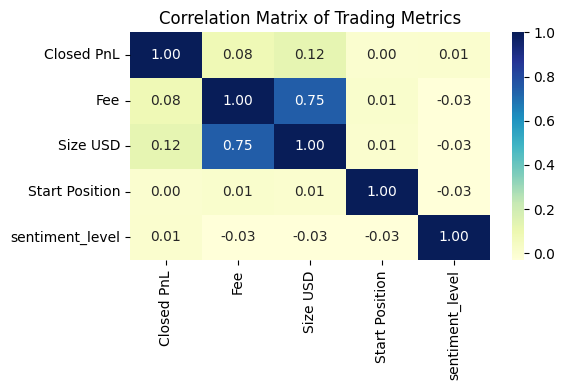

In [22]:
# Correlation Matrix: Trading metrics
metrics_df = merged_df[['Closed PnL', 'Fee', 'Size USD', 'Start Position', 'sentiment_level']].dropna()

plt.figure(figsize=(6,4))
corr = metrics_df.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Matrix of Trading Metrics")
plt.tight_layout()
plt.show()

| Metric Pair                   | Correlation           | What It Means                                                                                                                                                                    |
| ----------------------------- | --------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Fee ↔ Size USD**            | **0.75**              | 📈 Strong positive relationship: **Larger trades incur higher fees**, as expected. This validates fee structure integrity.                                                       |
| **Closed PnL ↔ Size USD**     | **0.12**              | 🟢 Weak positive correlation: **Bigger trades slightly increase PnL**, but not strongly. Suggests **strategy/entry matters more than size alone**.                               |
| **Closed PnL ↔ Fee**          | **0.08**              | Slight correlation: Likely a side-effect of fee-size-PnL triangle, but not enough to say high fees = high PnL.                                                                   |
| **Start Position ↔ Anything** | \~0.00                | ❌ No correlation with Size, Fee, or PnL. Suggests **initial leverage or position data isn’t influencing outcomes much**, or it might be improperly scaled/captured.              |
| **Sentiment Level ↔ All**     | All values near **0** | 🚫 Very weak or no correlation: **Sentiment level itself isn’t linearly affecting PnL, size, or fee directly**. Impact may be **non-linear or categorical** (which makes sense). |


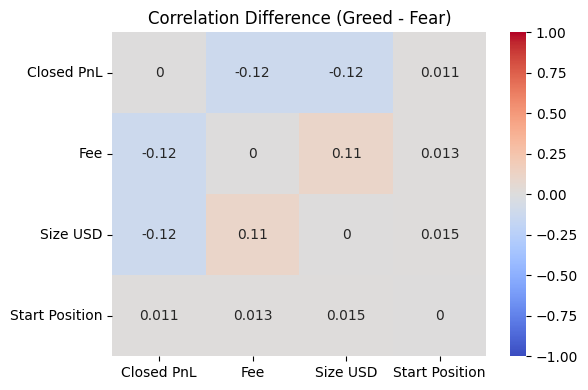


Correlation Difference Matrix (Greed - Fear):
                Closed PnL       Fee  Size USD  Start Position
Closed PnL        0.000000 -0.122824 -0.121499        0.010626
Fee              -0.122824  0.000000  0.107153        0.012655
Size USD         -0.121499  0.107153  0.000000        0.015259
Start Position    0.010626  0.012655  0.015259        0.000000


In [23]:
# Define trading features to analyze
features = ['Closed PnL', 'Fee', 'Size USD', 'Start Position']

# Create binary sentiment group (make sure your DataFrame has this column)
merged_df['sentiment_binary'] = merged_df['classification'].apply(lambda x: 'Greed' if 'Greed' in x else 'Fear')

# Assuming greed_corr and fear_corr are already defined as:
greed_corr = merged_df[merged_df['sentiment_binary'] == 'Greed'][features].corr()
fear_corr = merged_df[merged_df['sentiment_binary'] == 'Fear'][features].corr()

# 1. Compute correlation difference
corr_diff = greed_corr - fear_corr

# 2. Plot the difference matrix
plt.figure(figsize=(6, 4))
sns.heatmap(corr_diff, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title("Correlation Difference (Greed - Fear)")
plt.tight_layout()
plt.show()

# 3. Print matrix for reference
print("\nCorrelation Difference Matrix (Greed - Fear):")
print(corr_diff)


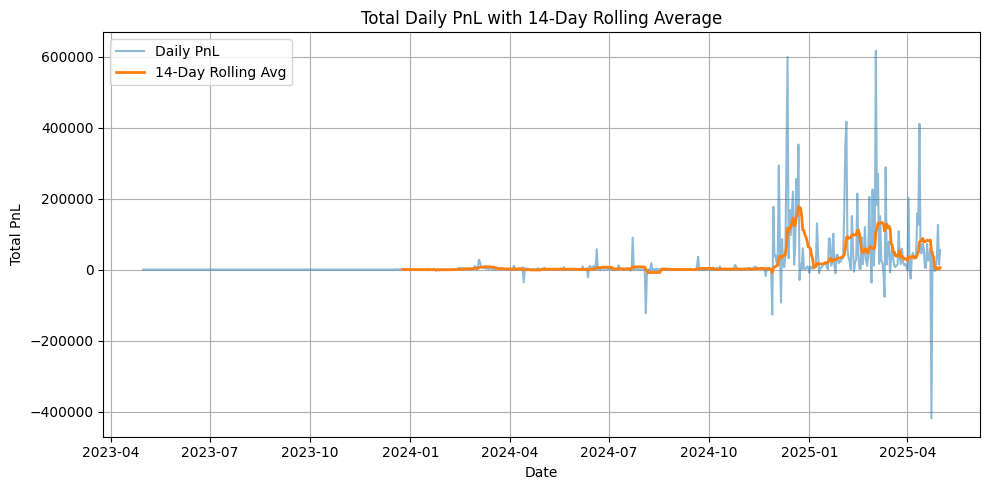

In [24]:
# Rolling Average PnL (14-day window)
daily_total = merged_df.groupby('date')['Closed PnL'].sum().reset_index()
daily_total['rolling_pnl_14d'] = daily_total['Closed PnL'].rolling(window=14).mean()

plt.figure(figsize=(10, 5))
plt.plot(daily_total['date'], daily_total['Closed PnL'], label="Daily PnL", alpha=0.5)
plt.plot(daily_total['date'], daily_total['rolling_pnl_14d'], label="14-Day Rolling Avg", linewidth=2)
plt.title("Total Daily PnL with 14-Day Rolling Average")
plt.xlabel("Date")
plt.ylabel("Total PnL")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
# Strategy Rule Generation — Simple statistical rules
strategy_rules = {}

# Rule 1: Best average trade PnL by sentiment
avg_pnl_by_sentiment = merged_df.groupby('classification')['Closed PnL'].mean().sort_values(ascending=False)
strategy_rules['Trade during this sentiment for best avg PnL'] = avg_pnl_by_sentiment.idxmax()

# Rule 2: Buy ratio per sentiment
buy_ratio = merged_df.groupby('classification')['Side'].apply(lambda x: (x == 'BUY').mean())
strategy_rules['Sentiment where BUY is preferred'] = buy_ratio.idxmax()
strategy_rules['Sentiment where SELL is more frequent'] = buy_ratio.idxmin()

# Rule 3: Highest avg trade size
avg_size = merged_df.groupby('classification')['Size USD'].mean()
strategy_rules['Sentiment with highest avg trade size'] = avg_size.idxmax()

# Rule 4: Most volatile sentiment (PnL std dev)
volatility = merged_df.groupby('classification')['Closed PnL'].std()
strategy_rules['Most volatile sentiment'] = volatility.idxmax()

# Display Strategy Rules
print("\n📋 Derived Strategy Rules:")
for rule, result in strategy_rules.items():
    print(f"- {rule}: {result}")


📋 Derived Strategy Rules:
- Trade during this sentiment for best avg PnL: Extreme Greed
- Sentiment where BUY is preferred: Extreme Fear
- Sentiment where SELL is more frequent: Extreme Greed
- Sentiment with highest avg trade size: Fear
- Most volatile sentiment: Extreme Fear


📋 Derived Strategy Rules:
- Trade during this sentiment for best avg PnL: Extreme Greed
- Sentiment where BUY is preferred: Greed
- Sentiment where SELL is more frequent: Extreme Fear
- Sentiment with highest avg trade size: Greed
- Most volatile sentiment: Fear

In [ ]:
### Predictive Models

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import root_mean_squared_error, r2_score
import pandas as pd

# Prepare features
model_df = merged_df[['Closed PnL', 'Size USD', 'Fee', 'Start Position', 'classification', 'Side']].dropna()

# Encode categorical variables
le_sentiment = LabelEncoder()
le_side = LabelEncoder()
model_df['sentiment_enc'] = le_sentiment.fit_transform(model_df['classification'])
model_df['side_enc'] = le_side.fit_transform(model_df['Side'])

# Feature matrix and target
features = ['Size USD', 'Fee', 'Start Position', 'sentiment_enc', 'side_enc']
X = model_df[features]
y = model_df['Closed PnL']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Define models
models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "SVR": SVR()
}

In [33]:
# Evaluate each model
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = root_mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    results.append((name, rmse, r2))

In [34]:
# Select top 3 models by RMSE for Voting Regressor
top_models = sorted(results, key=lambda x: x[1])[:3]
voting_estimators = [(name, models[name]) for name, _, _ in top_models]

voting_reg = VotingRegressor(estimators=voting_estimators)
voting_reg.fit(X_train, y_train)
voting_preds = voting_reg.predict(X_test)
voting_rmse = root_mean_squared_error(y_test, voting_preds)
voting_r2 = r2_score(y_test, voting_preds)

results.append(("VotingRegressor", voting_rmse, voting_r2))

# Sort and print
results = sorted(results, key=lambda x: x[1])
for name, rmse, r2 in results:
    print(f"{name}: RMSE = {rmse:.2f}, R² = {r2:.4f}")

VotingRegressor: RMSE = 636.47, R² = 0.1209
RandomForest: RMSE = 647.42, R² = 0.0904
SVR: RMSE = 680.16, R² = -0.0039
LinearRegression: RMSE = 681.05, R² = -0.0066
GradientBoosting: RMSE = 719.79, R² = -0.1243
KNN: RMSE = 720.75, R² = -0.1273


Gradient Boosting Regressor → RMSE: 650.01, R²: 0.0831


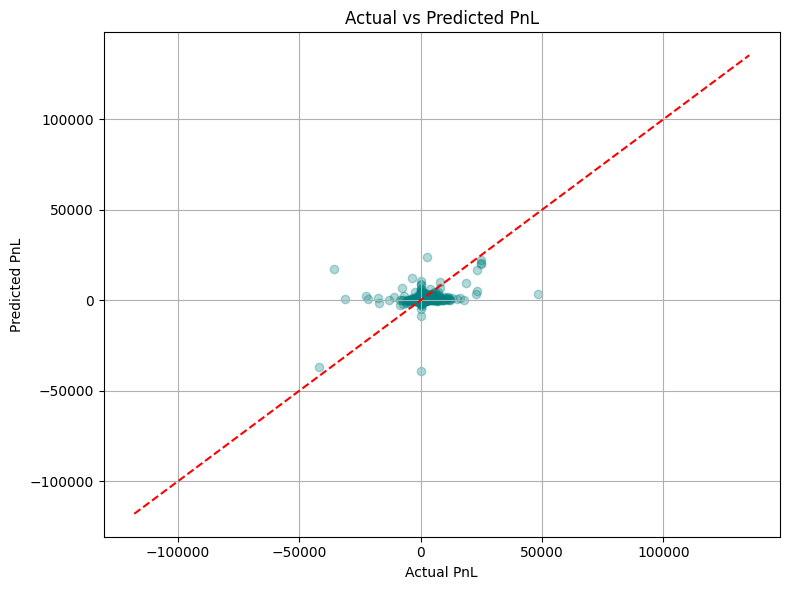

In [39]:
# Prepare data
model_df = merged_df[['Closed PnL', 'Size USD', 'Fee', 'Start Position', 'classification', 'Side']].dropna()

# Encode categorical features
le_sentiment = LabelEncoder()
le_side = LabelEncoder()
model_df['sentiment_enc'] = le_sentiment.fit_transform(model_df['classification'])
model_df['side_enc'] = le_side.fit_transform(model_df['Side'])

# Define features and target
features = ['Size USD', 'Fee', 'Start Position', 'sentiment_enc', 'side_enc']
X = model_df[features]
y = model_df['Closed PnL']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=150, learning_rate=0.1, max_depth=5, random_state=42)
gbr.fit(X_train, y_train)

# Predict
y_pred = gbr.predict(X_test)

# Evaluation
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Gradient Boosting Regressor → RMSE: {rmse:.2f}, R²: {r2:.4f}")

# Optional: Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual PnL")
plt.ylabel("Predicted PnL")
plt.title("Actual vs Predicted PnL")
plt.grid(True)
plt.tight_layout()
plt.show()
